# Visualizing Users

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.dates import datestr2num
from sklearn.preprocessing import normalize
import random

In [ ]:
usecolumns = [0, 6, 12, 13, 19, 20, 21]
u1e33 = pd.read_csv('Chania/1e33.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u1e33 = np.hstack([np.zeros((len(u1e33),1), dtype=int), u1e33])
u7cbc = pd.read_csv('Chania/7cbc.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u7cbc = np.hstack([np.zeros((len(u7cbc),1), dtype=int)+1, u7cbc])
u2222 = pd.read_csv('Chania/2222.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u2222 = np.hstack([np.zeros((len(u2222),1), dtype=int)+2, u2222])
u6882 = pd.read_csv('Chania/6882.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u6882 = np.hstack([np.zeros((len(u6882),1), dtype=int)+3, u6882])
ua841 = pd.read_csv('Chania/a841.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
ua841 = np.hstack([np.zeros((len(ua841),1), dtype=int)+4, ua841])
print("Data includes user ID and...")
print(u1e33[0][1:])
Chania = np.vstack([u1e33[1:len(u1e33),:],u7cbc[1:len(u7cbc),:], u2222[1:len(u2222),:], u6882[1:len(u6882),:], ua841[1:len(ua841),:]])

In [ ]:
# Chania = np.transpose(np.vstack([Chania[:,0], datestr2num(Chania[:,1]), strorfloat(Chania[:,2]), Chania[:,3]]))
Chania = np.transpose(np.vstack([Chania[:,0], datestr2num(Chania[:,1]), Chania[:,2], Chania[:,3], Chania[:,4], Chania[:,5], Chania[:,6], Chania[:,7]]))

Only include data between April 4, 2013 and April 14, 2013

In [ ]:
rows = np.where((Chania[:,1] >= Chania[0][1]) & (Chania[:,1] <= Chania[67050][1]))
Chania = Chania[rows]

In [ ]:
for i in range(len(Chania[:,2])):
    try:
        Chania[:,2][i] = int(Chania[:,2][i])
        Chania[:,3][i] = float(Chania[:,3][i])
        Chania[:,4][i] = float(Chania[:,4][i])
        Chania[:,5][i] = float(Chania[:,5][i])
        Chania[:,6][i] = float(Chania[:,6][i])
        Chania[:,7][i] = float(Chania[:,7][i])
    except:
        pass

Remove data where the latitude indicates an error

In [ ]:
Chania = Chania[np.where(Chania[:,3] != 0)]

Latitude and Longitudes for users 0 through 4

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, sharex='all', sharey='all', figsize=(15, 5))
plt.axis([24.015,24.04, 35.505,35.525])
axes[0].scatter(Chania[np.where(Chania[:,0] == 0)][:,4], Chania[np.where(Chania[:,0] == 0)][:,3])
axes[1].scatter(Chania[np.where(Chania[:,0] == 1)][:,4], Chania[np.where(Chania[:,0] == 1)][:,3])
axes[2].scatter(Chania[np.where(Chania[:,0] == 2)][:,4], Chania[np.where(Chania[:,0] == 2)][:,3])
axes[3].scatter(Chania[np.where(Chania[:,0] == 3)][:,4], Chania[np.where(Chania[:,0] == 3)][:,3])
axes[4].scatter(Chania[np.where(Chania[:,0] == 4)][:,4], Chania[np.where(Chania[:,0] == 4)][:,3])
plt.show()

for user in [0, 1, 2, 3, 4]:
    print(len(Chania[np.where(Chania[:,0] == user)]), " points from user", user)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Chania[np.where(Chania[:,0] == 0)][:,4], Chania[np.where(Chania[:,0] == 0)][:,3], c='red', label='1e33')
ax.scatter(Chania[np.where(Chania[:,0] == 1)][:,4], Chania[np.where(Chania[:,0] == 1)][:,3], c='orange', label='7cbc')
ax.scatter(Chania[np.where(Chania[:,0] == 2)][:,4], Chania[np.where(Chania[:,0] == 2)][:,3], c='yellow', label='2222')
ax.scatter(Chania[np.where(Chania[:,0] == 3)][:,4], Chania[np.where(Chania[:,0] == 3)][:,3], c='green', label='6882')
ax.scatter(Chania[np.where(Chania[:,0] == 4)][:,4], Chania[np.where(Chania[:,0] == 4)][:,3], c='blue', label='a841')


ax.legend()
ax.grid(True)

plt.axis([24.015,24.04,35.505,35.525])
plt.show()

points can jump at least 0.8148 km in 6 seconds

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
im = plt.imread("Chania.png")
ax.imshow(im)

def convertx(x):
    return 584/(24.04-24.015)*(x-24.015)

def converty(y):
    return 575 - 575/(35.525-35.505)*(y-35.505)

colors = ['red','orange','yellow','green','blue']
labels = ['1e33', '7cbc', '2222', '6882', 'a841']

for user in [0,1,2,3,4]:
    x = Chania[np.where(Chania[:,0] == user)][:,4]
    y = Chania[np.where(Chania[:,0] == user)][:,3]
    ax.scatter(convertx(x), converty(y), c=colors[user], label=labels[user])

ax.legend()
ax.grid(True)
plt.show()

one grid space  
0.3798 km in the x direction  
0.36895 km in the y direction

# Signal Mapping

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
Chania

In [ ]:
plt.plot(Chania[:,2])
plt.title("Reported RSSI")

In [ ]:
print("Plotting RSS values: low values are dark, high values are light")

fig, ax = plt.subplots(figsize=(15, 15))
# im = plt.imread("Chania.png")
# ax.imshow(im)

# remove possible error indicated by rssi = 99
smoothrssi = Chania[np.where(Chania[:,2]<99)]

x = smoothrssi[:,4]
y = smoothrssi[:,3]

plt.scatter(x, y, c=smoothrssi[:,2])
plt.show()

In [ ]:
# data = np.hstack([smoothrssi[:,0:2], smoothrssi[:,3:8]])
# print(data)

In [ ]:
# justcoords = data[:,2:4]

In [ ]:
# labels = smoothrssi[:,2]
# print(labels)

In [ ]:
# print(data.shape)
# print(justcoords.shape)

In [ ]:
## Train on all data

# ntrain, ntest = 10000, 200
# order = np.argsort(np.random.random(labels.shape))
# train_data = data[order][0:ntrain]
# train_labels = labels[order][0:ntrain]
# test_data = data[order][ntrain:ntrain+ntest]
# test_labels = labels[order][ntrain:ntrain+ntest]

In [ ]:
# ## Train on just coords

# ntrain, ntest = 10000, 200
# order = np.argsort(np.random.random(labels.shape))
# train_data = justcoords[order][0:ntrain]
# train_labels = labels[order][0:ntrain]
# test_data = justcoords[order][ntrain:ntrain+ntest]
# test_labels = labels[order][ntrain:ntrain+ntest]

## Normalized Data

In [ ]:
xcoord = smoothrssi[:,4]
xcoord = (xcoord-np.mean(xcoord))/np.std(xcoord)
ycoord = smoothrssi[:,3]
ycoord = (ycoord-np.mean(ycoord))/np.std(ycoord)
zlabel = smoothrssi[:,2]
zlabel = (zlabel-np.mean(zlabel))/np.std(zlabel)

In [ ]:
print("Plotting RSS values: low values are dark, high values are light")
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(xcoord, ycoord, c=zlabel)
plt.show()

In [ ]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
#     optimizer = tf.train.RMSPropOptimizer(0.001)
    optimizer = tf.train.FtrlOptimizer(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
## Train on normalized data
normcoords = np.transpose(np.vstack([xcoord, ycoord]))
normlabels = zlabel

ntrain, ntest = 800, 200
order = np.argsort(np.random.random(labels.shape))
train_data = normcoords[order][0:ntrain]
train_labels = normlabels[order][0:ntrain]
test_data = normcoords[order][ntrain:ntrain+ntest]
test_labels = normlabels[order][ntrain:ntrain+ntest]

In [ ]:
print("training...")
model.fit(train_data, train_labels, epochs=100, verbose=0)
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=0)
print(loss, mae, mse)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x = test_data[:,0]
y = test_data[:,1]

z_est = model.predict(test_data)
c_est = np.transpose(z_est).tolist()[0]
z_true = test_labels
c_true = np.transpose(z_true).tolist()

ax[0].set_title("Predicted labels for test data")
ax[0].scatter(x, y, c=c_est)
ax[1].set_title("Actual labels for test data")
ax[1].scatter(x, y, c=c_true)
plt.show()

what is this in bars on your phone

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

n = 1000
x = np.random.uniform(min(normcoords[:,0]), max(normcoords[:,0]), size=n)
y = np.random.uniform(min(normcoords[:,1]), max(normcoords[:,1]), size=n)
z = model.predict(np.transpose(np.vstack([x, y])))

c=np.transpose(z).tolist()[0]

plt.title("Signal Map")
plt.scatter(x, y, c=c)
plt.show()

## Supervised learning of user ID

In [ ]:
data = Chania[:,1:8]

In [ ]:
for col in range(data.shape[1]):
    try:
        data[:,col] = (data[:,col]-np.mean(data[:,col]))/np.std(data[:,col])
    except:
        data[:,col] = (data[:,col]-np.mean(data[:,col]))

In [ ]:
data[0]

In [ ]:
labels = Chania[:,0]

In [ ]:
ntrain, ntest = 800, 200
order = np.argsort(np.random.random(labels.shape))
train_data = data[order][0:ntrain]
train_labels = labels[order][0:ntrain]
test_data = data[order][ntrain:ntrain+ntest]
test_labels = labels[order][ntrain:ntrain+ntest]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dense(5, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_data, train_labels, epochs=1000, verbose=0)
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(test_acc)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x = test_data[:,3]
y = test_data[:,2]

z_est = np.argmax(model.predict(test_data), axis=1)
c_est = np.transpose(z_est).tolist()
z_true = test_labels
c_true = np.transpose(z_true).tolist()

ax[0].set_title("Predicted users for test data")
ax[0].scatter(x, y, c=c_est)
ax[1].set_title("Actual users for test data")
ax[1].scatter(x, y, c=c_true)
plt.show()

In [92]:
import numpy as np
import random
import os

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from math import ceil, log

def norm_x(x, changedB=False):
    if changedB:
        x[:,1] = 1/(10**(x[:,1]/10))
    for col in range(x.shape[1]):
        vals = x[:,col]
        vals = (vals-np.mean(vals))/np.std(vals)
        x[:,col] = vals
    return x

def sampleChania(Chania, n_points, seed_val=0, pathloss=False):
    np.random.seed(seed_val)
    data = Chania[:,0:8]
    order = np.argsort(np.random.random(data.shape[0]))
    x = data[order][:n_points, 1:5]   
    trueusers = data[order][:n_points,0]
    n_clusters = 5
    x = norm_x(x, changedB=pathloss)
    return tf.constant(x, dtype=tf.float32), tf.constant(trueusers, dtype=tf.float32)

def tf_cov(x):
    mean_x = tf.reduce_mean(x, axis=0, keepdims=True)
    mx = tf.matmul(tf.transpose(mean_x), mean_x)
    vx = tf.matmul(tf.transpose(x), x)/tf.cast(tf.shape(x)[0], tf.float32)
    cov_xx = vx - mx
    return cov_xx
        
def vandermonde(x):
    vandermonde_x = tf.transpose(tf.stack([tf.ones_like(x[:,0]), 
                                           x[:,0], 
                                           x[:,1], 
                                           tf.square(x[:,0]), 
                                           tf.square(x[:,1]),
                                          ]))
#                                            tf.multiply(x[:,0], x[:,1])
#                                           ]))
    return vandermonde_x

def vandermonde4(x):
    vandermonde4_x = tf.transpose(tf.stack([tf.ones_like(x[:,0]),
                                            x[:,0],
                                            x[:,1],
                                            tf.square(x[:,0]),
                                            tf.square(x[:,1]),
                                            tf.multiply(x[:,0], x[:,1]),
                                            tf.multiply(tf.multiply(x[:,0], x[:,0]), x[:,0]),
                                            tf.multiply(tf.multiply(x[:,1], x[:,1]), x[:,1]),
                                            tf.multiply(tf.square(x[:,0]), x[:,1]),
                                            tf.multiply(tf.square(x[:,1]), x[:,0]),
                                            tf.multiply(tf.square(x[:,0]), tf.square(x[:,0])),
                                            tf.multiply(tf.square(x[:,1]), tf.square(x[:,1])),
                                            tf.multiply(tf.square(x[:,0]), tf.square(x[:,1])),
                                            tf.multiply(tf.square(x[:,0]), tf.multiply(x[:,0], x[:,1])),
                                            tf.multiply(tf.square(x[:,1]), tf.multiply(x[:,1], x[:,0]))
                                           ]))
    return vandermonde4_x

def stats_matrix(x):
    return tf.stack([tf.reduce_mean(x,0), tf.keras.backend.std(x,0)])

Chania = np.genfromtxt('processedChania.csv', delimiter=',')

Chania = Chania[np.where(Chania[:,2]<99)]

In [4]:
def train(trainstep, trainloss, max_iter, session, vis=False):
    plotlist = []
    delta1 = 100
    delta2 = 0
    count_iter = 0
    while abs(delta1 - delta2) >= 0.0005*delta1 and count_iter < max_iter:
        count_iter += 1
        delta1 = trainloss.eval(session=session)
        trainstep.run(session=session)
        delta2 = trainloss.eval(session=session)
        plotlist.append(delta2)
        
        
    if vis:
        if abs(delta1-delta2) < 0.0005*delta1:
#             print("converged in", count_iter, "steps")
            pass

        else:
            plt.plot(plotlist)
            raise ValueError()
    
    return plotlist, count_iter==1

## Unsupervised learning of user ID

In [116]:
def dist(x, y, xprime, yprime):
    return ((abs(x-xprime)**2)+(abs(y-yprime))**2)**1/2

In [117]:
def point_dist(new, old):
    x, y = new[4], new[3]
    xprime, yprime = old[4], old[3]
    return dist(x, y, xprime, yprime)

In [118]:
def findlabels(label, data, epsilon, plotdata, plotlabels):
    if len(data) == 0:
        return int(plotlabels[-1]+1), plotdata, plotlabels
    sorted_data, dist_from_start = sortbydistfromstart(data[0], data)
    neighbors = sorted_data[np.where(dist_from_start < epsilon)]
    labels = np.ones(len(neighbors))*label
    if label == 0:
        plotdata = neighbors
        plotlabels = labels
    else:
        plotdata = np.concatenate((plotdata, neighbors), axis=0)
        plotlabels = np.concatenate((plotlabels, labels), axis=0)

    return findlabels(label+1, sorted_data[np.where(dist_from_start >= epsilon)], epsilon, plotdata, plotlabels)

In [119]:
def sortbydistfromstart(startpoint, data):
    dist_from_start = np.array(list(map(lambda point: point_dist(point, startpoint), data)))
    closeness = np.argsort(dist_from_start)
    return data[closeness], dist_from_start[closeness]

In [146]:
def cluster(data, num_users):
    mindist = 0
    _, distarr = sortbydistfromstart(data[0], data)
    maxdist = distarr[-1]
    n_iter = 0
    
    while n_iter < 50:
        n_iter += 1
        epsilon = (mindist+maxdist)/2
        num_clusters, plotdata, plotlabels = findlabels(0, data, epsilon, None, None)
        if num_clusters == num_users:
            return plotlabels, plotdata
        elif num_clusters < num_users:
            maxdist = epsilon
        else:
            mindist = epsilon
    return plotlabels, plotdata

In [147]:
from itertools import permutations

In [186]:
def cluster_accuracy(clusterlabels, truelabels, plotdata):
    a, ix = np.unique(truelabels, return_inverse=True)
    accuracy = []
    perms = []
    for p in permutations(a):
        p = np.array(p)
        acc = np.count_nonzero(np.equal(clusterlabels, p[ix]))/len(clusterlabels)
        if acc == 1.0:
            plotdata[:,0] = p[ix]
            return acc*100
        accuracy.append(acc)
        perms.append(p[ix])
    accuracy = np.array(accuracy)
    plotdata[:,0] = perms[np.argmax(accuracy)]
    return np.max(accuracy)*100

In [149]:
sess = tf.Session()
x, trueusers = sampleChania(Chania, 100, seed_val=0, pathloss=True)

# TODO stack x and trueusers

x_with_labels = tf.concat([tf.reshape(trueusers, [100,1]), x], axis=1)
sess.run(tf.global_variables_initializer())

In [150]:
yarray = x.eval(session=sess) + np.random.normal(scale=0.5, size=(100,4))
y = tf.constant(yarray, tf.float32)
y_with_labels = tf.concat([tf.reshape(trueusers, [100,1]), y], axis=1)

Cluster Accuracy (%): 100.0


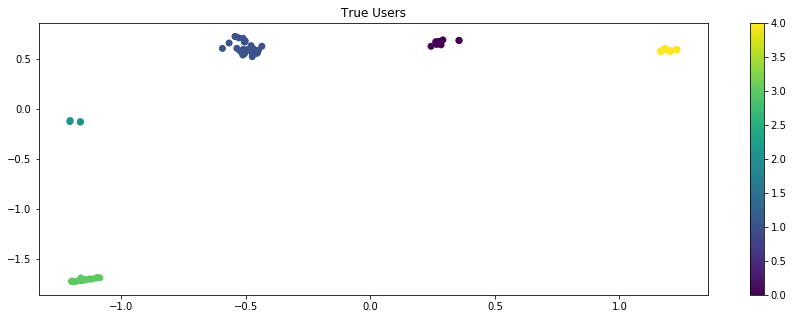

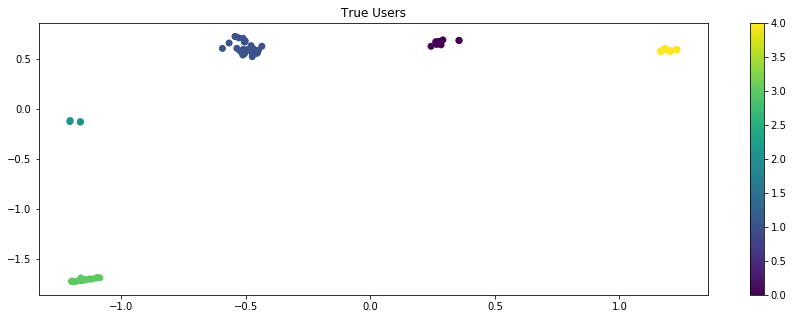

In [187]:
clusterlabels, plotdata = cluster(x_with_labels.eval(session=sess), 5)
print("Cluster Accuracy (%):", cluster_accuracy(clusterlabels, plotdata[:,0], plotdata))
# print(clusterlabels)
# plotdata[:,0].sort()
# print(plotdata[:,0])
fig = plt.figure(figsize=(15,5))
plt.scatter(plotdata[:,4], plotdata[:,3], c=plotdata[:,0])
plt.title("True Users")
plt.colorbar()
fig = plt.figure(figsize=(15,5))
plt.scatter(plotdata[:,4], plotdata[:,3], c=clusterlabels)
plt.title("True Users")
plt.colorbar()

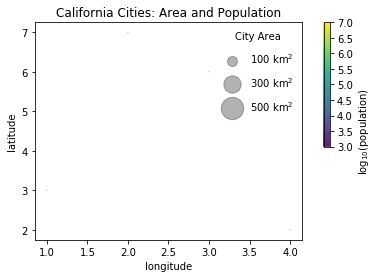

In [142]:
# Scatter the points, using size and color but no label
plt.scatter([1,2,3,4], [3,7,6,2], label=None,
            c=np.log10([1,2,10,1]), cmap='viridis',
            s=1, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## PRIVITIZER

input: userID, RSSI, lat, long  
output: userID, RSSI', lat', long'  
  
map(input) -> inputmap(x, y) = rss1  
map(output) -> outputmap(x, y) = rss2

cluster(input) -> cluster_accuracy(clusterinput, trueinput) = acc1  
cluster(output) -> cluster_accuracy(clusteroutput, trueoutput) = acc2
  
lossMAP: mse(rss1, rss2)  
lossAD: acc2

loss = wA(lossMAP) + wB(lossAD)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# normalize data
data = Chania[:,0:8]
n_points = 100
order = np.argsort(np.random.random(data.shape[0]))
x = data[order][:n_points, 1:5]
trueusers = data[order][:n_points,0]
n_clusters = 5

In [ ]:
def norm_x(x):
    for col in range(x.shape[1]):
        vals = x[:,col]
        vals = (vals-np.mean(vals))/np.std(vals)
        x[:,col] = vals
    return x

x = norm_x(x)

In [ ]:
x = tf.constant(x, dtype=tf.float32)

In [ ]:
nn_model = keras.Sequential([keras.layers.Dense(1), keras.layers.Dense(x.shape[1].value)])
y = nn_model(x)

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

print("input shape:", x.shape)
print("output shape:", y.shape)

In [ ]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
#     optimizer = tf.train.RMSPropOptimizer(0.001)
    optimizer = tf.train.FtrlOptimizer(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [ ]:
def lossMAP(trueusers, x, y, sess):
    inputdata = x.eval(session=sess)
    inputdata = np.vstack((trueusers.T, inputdata.T)).T
    outputdata = y.eval(session=sess)
    outputdata = np.vstack((trueusers.T, outputdata.T)).T
    testpoints = createtestpoints(inputdata)
    inputmodel = makemodel(inputdata)
    inputmap = inputmodel.predict(testpoints)
    outputmodel = makemodel(outputdata)
    outputmap = outputmodel.predict(testpoints)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    c1 = np.transpose(inputmap)
    c2 = np.transpose(outputmap)
    
    ax[0].scatter(testpoints[:,1], testpoints[:,0], c=c1[0])
    ax[0].set_title("Map created from unobfuscated data")
    ax[1].scatter(testpoints[:,1], testpoints[:,0], c=c2[0])
    ax[1].set_title("Map created from obfuscated data")
    
    return mse(inputmap, outputmap)

def createtestpoints(inputdata):
    xmin, xmax = np.min(inputdata[:,3]), np.max(inputdata[:,3])
    ymin, ymax = np.min(inputdata[:,4]), np.max(inputdata[:,4])
    return np.mgrid[xmin:xmax:15j, ymin:ymax:15j].reshape(2,-1).T

def makemodel(inputdata):
    model = build_model()
    train_data = inputdata[:,3:]
    train_labels = inputdata[:,2]
    model.fit(train_data, train_labels, epochs=100, verbose=0)
    return model

def mse(inputmap, outputmap):
    delta = inputmap - outputmap
    return tf.constant(np.mean(np.square(delta)), dtype=tf.float32)

def lossAD(trueusers, x, y, numusers, sess):
    print("Unobfuscated Data")
    inputdata = x.eval(session=sess)
    inputdata = np.vstack((trueusers.T, inputdata.T)).T
    icl, itl = cluster(inputdata, numusers)
    iacc = cluster_accuracy(icl, itl)
    print("clustering accuracy:", iacc)
    
    print("Obfuscated Data")
    outputdata = y.eval(session=sess)
    outputdata = np.vstack((trueusers.T, outputdata.T)).T
    clusterlabels, truelabels = cluster(outputdata, numusers)
    acc = cluster_accuracy(clusterlabels, truelabels)
    print("clustering accuracy:", acc)
    return tf.constant(acc, dtype=tf.float32)

In [ ]:
lossAD(trueusers, x, y, 5, sess)

In [ ]:
loss1 = lossMAP(trueusers, x, y, sess)
loss2 = lossAD(trueusers, x, y, 5, sess)
print(sess.run(loss))

In [ ]:
loss3 = tf.reduce_mean(tf.squared_difference(x, y))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss3)

In [ ]:
for i in range(100):
  _, loss_value = sess.run((train, loss3))
#   print(loss_value)

In [ ]:
y_pred = nn_model(x)

In [ ]:
lossMAP(trueusers, x, y_pred, sess)

In [ ]:
lossAD(trueusers, x, y_pred, 5, sess)